## Amazon Book Reviews Part I: Exploratory Data Analysis and Summary Statistics of Book Ratings

#### This is the 5-core dataset which means that each user and item has at least 5 reviews. The dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/. 

### Introduction

1. The dataset contains ratings from 1996-2014. 
2. Ratings (stars) are given in a scale of 1-5. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [31]:
project_id = 'dotted-chiller-156222'

In [22]:
query1 = "SELECT overall, count(overall) as total FROM amazon_book_small.rev1 GROUP BY overall ORDER BY overall"

In [23]:
do = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 67.9 Mb

Retrieving results...
Got 5 rows.

Total time taken 1.79 s.
Finished at 2017-01-22 15:38:32.


### Total overall rating (1996-2014)

In [24]:
do = do.set_index('overall')
do

,total
overall,
1,323833
2,415110
3,955189
4,2223094
5,4980815


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

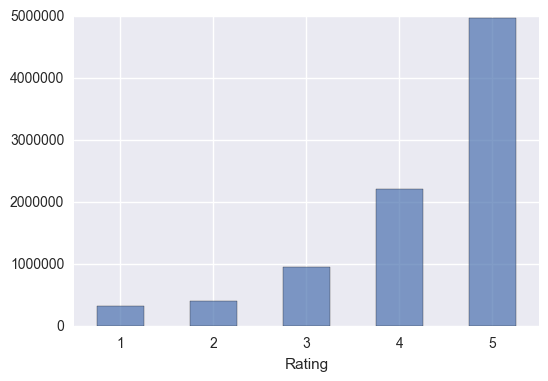

In [50]:
do.total.plot(kind = 'bar', alpha = 0.7)
plt.xlabel('Rating')
plt.xticks(rotation = 'horizontal')

### 25 most reviewed books

In [32]:
query2 = "SELECT asin, count(asin) as count FROM amazon_book_small.rev1 GROUP BY asin ORDER BY count DESC LIMIT 25"

In [35]:
da = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 101.8 Mb

Retrieving results...
Got 25 rows.

Total time taken 3.17 s.
Finished at 2017-01-22 16:51:16.


In [38]:
da = da.set_index('asin')
da.head(1)

,count
asin,
030758836X,7440


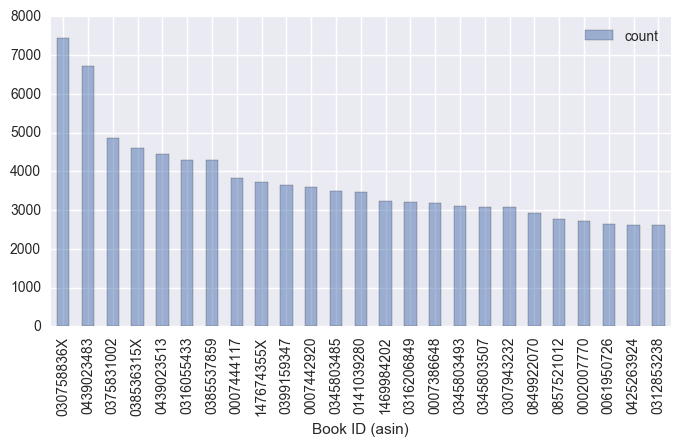

In [55]:
da.plot(kind = 'bar', figsize=[8, 4], alpha = 0.5)
plt.xlabel('Book ID (asin)')

### 25 most active reviewers 

In [58]:
query3 = "SELECT reviewerID, count(reviewerID) as count FROM amazon_book_small.rev1 GROUP BY reviewerID ORDER BY count DESC \
LIMIT 25"

In [59]:
db = gbq.read_gbq(query3, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 133.5 Mb

Retrieving results...
Got 25 rows.

Total time taken 3.64 s.
Finished at 2017-01-22 17:38:36.


In [60]:
db = db.set_index('reviewerID')
db.head(1)

,count
reviewerID,
AFVQZQ8PW0L,23222


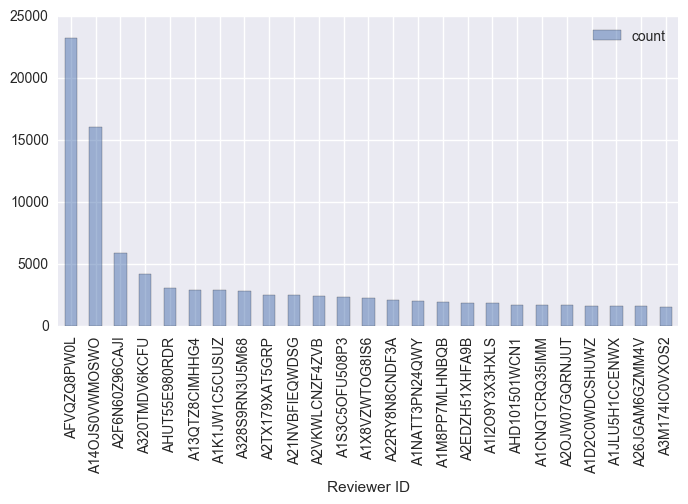

In [61]:
db.plot(kind = 'bar', figsize=[8, 4], alpha = 0.5)
plt.xlabel('Reviewer ID')

#### Someone has written ~23000 reviews!!

In [115]:
gbq.read_gbq("SELECT COUNT(DISTINCT(reviewerID)) FROM amazon_book_small.rev1", project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 133.5 Mb

Retrieving results...
Got 1 rows.

Total time taken 2.58 s.
Finished at 2017-01-22 21:07:26.


,f0_
0,569448


In [116]:
total = 8898041.0
avg_reviews = 569448.0/total
avg_reviews

0.0639970078807234

### Review Trend Over the Years

-I have to read the data in parts to fit it into my laptop memory

In [65]:
query4 = "SELECT unixReviewTime, overall, FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2007-01-01 00:00:00 UTC' \
ORDER BY unixReviewTime"

In [66]:
dc = gbq.read_gbq(query4, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 135.8 Mb

Retrieving results...
  Got page: 1; 11.0% done. Elapsed 11.22 s.
  Got page: 2; 22.0% done. Elapsed 14.8 s.
  Got page: 3; 33.0% done. Elapsed 18.42 s.
  Got page: 4; 45.0% done. Elapsed 22.11 s.
  Got page: 5; 56.0% done. Elapsed 25.41 s.
  Got page: 6; 67.0% done. Elapsed 29.78 s.
  Got page: 7; 78.0% done. Elapsed 32.99 s.
  Got page: 8; 89.0% done. Elapsed 37.55 s.
  Got page: 9; 100.0% done. Elapsed 41.29 s.
Got 897269 rows.

Total time taken 51.99 s.
Finished at 2017-01-22 18:48:05.


In [89]:
dc.head(1)

,unixReviewTime,overall
0,2006-06-25,5


In [67]:
dc.head(1)

,unixReviewTime,overall
0,2006-06-25,5


In [82]:
dc.tail(1)

,unixReviewTime,overall
897268,2000-10-07,4


In [74]:
c = dc.groupby(dc.unixReviewTime.dt.year).size()
c

unixReviewTime
1996        25
1997      2041
1998      9731
1999     19574
2000     87855
2001     97068
2002    101028
2003    104329
2004    122834
2005    163506
2006    189278
dtype: int64

### Trend up to 2006

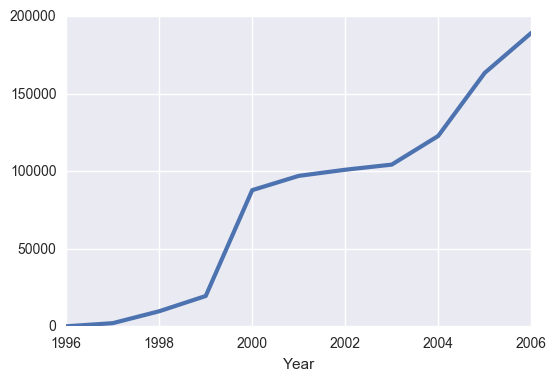

In [76]:
c.plot(kind = 'line', alpha = 1, linewidth = 3.0) 
plt.xlabel('Year')

In [77]:
query5 = "SELECT unixReviewTime, overall, FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '2007-01-02 00:00:00 UTC' AND unixReviewTime < '2011-01-01 00:00:00 UTC' \
ORDER BY unixReviewTime"

In [78]:
dd = gbq.read_gbq(query5, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 135.8 Mb

Retrieving results...
  Got page: 1; 8.0% done. Elapsed 10.96 s.
  Got page: 2; 16.0% done. Elapsed 15.49 s.
  Got page: 3; 24.0% done. Elapsed 19.47 s.
  Got page: 4; 31.0% done. Elapsed 23.19 s.
  Got page: 5; 39.0% done. Elapsed 27.33 s.
  Got page: 6; 47.0% done. Elapsed 31.73 s.
  Got page: 7; 55.0% done. Elapsed 36.83 s.
  Got page: 8; 63.0% done. Elapsed 40.79 s.
  Got page: 9; 71.0% done. Elapsed 45.28 s.
  Got page: 10; 78.0% done. Elapsed 48.88 s.
  Got page: 11; 86.0% done. Elapsed 52.98 s.
  Got page: 12; 94.0% done. Elapsed 56.53 s.
  Got page: 13; 100.0% done. Elapsed 59.92 s.
Got 1274218 rows.

Total time taken 74.72 s.
Finished at 2017-01-22 19:04:19.


In [79]:
dd.head(1)

,unixReviewTime,overall
0,2010-10-29,5


In [80]:
dd.tail(1)

,unixReviewTime,overall
1274217,2007-06-03,4


In [83]:
query6 = "SELECT unixReviewTime, overall, FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '2011-01-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC' \
ORDER BY unixReviewTime"

In [92]:
de = gbq.read_gbq(query6, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.28 s. Waiting...
  Elapsed 21.72 s. Waiting...
  Elapsed 32.17 s. Waiting...
Query done.
Processed: 135.8 Mb

Retrieving results...
  Got page: 1; 1.0% done. Elapsed 38.31 s.
  Got page: 2; 3.0% done. Elapsed 42.19 s.
  Got page: 3; 4.0% done. Elapsed 45.91 s.
  Got page: 4; 6.0% done. Elapsed 49.55 s.
  Got page: 5; 7.0% done. Elapsed 54.01 s.
  Got page: 6; 9.0% done. Elapsed 58.01 s.
  Got page: 7; 10.0% done. Elapsed 61.85 s.
  Got page: 8; 12.0% done. Elapsed 65.58 s.
  Got page: 9; 13.0% done. Elapsed 69.71 s.
  Got page: 10; 15.0% done. Elapsed 73.47 s.
  Got page: 11; 16.0% done. Elapsed 78.21 s.
  Got page: 12; 18.0% done. Elapsed 81.74 s.
  Got page: 13; 19.0% done. Elapsed 85.94 s.
  Got page: 14; 21.0% done. Elapsed 89.86 s.
  Got page: 15; 22.0% done. Elapsed 93.22 s.
  Got page: 16; 24.0% done. Elapsed 96.71 s.
  Got page: 17; 25.0% done. Elapsed 100.83 s.
  Got page: 18; 27.0% done. Elapsed 105.73 s.
  Got page: 19; 2

In [93]:
de.head(1)

,unixReviewTime,overall
0,2014-07-15,5


In [94]:
df = pd.concat([dc, dd, de])

In [106]:
f = df.groupby(df.unixReviewTime.dt.year).size()
f

unixReviewTime
1996         25
1997       2041
1998       9731
1999      19574
2000      87855
2001      97068
2002     101028
2003     104329
2004     122834
2005     163506
2006     189278
2007     237406
2008     274605
2009     349026
2010     413181
2011     591963
2012    1175910
2013    2982481
2014    1974115
dtype: int64

### Trend 1996-2014 

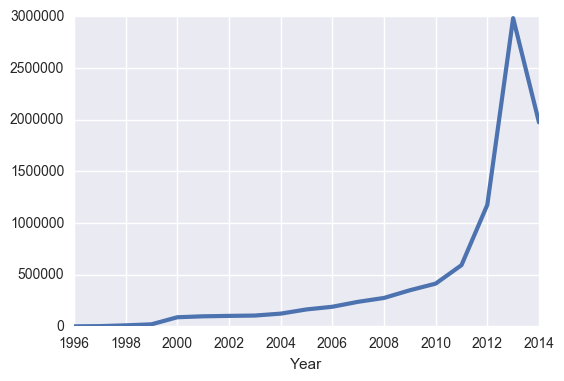

In [98]:
f.plot(kind = 'line', linewidth = 3.0)
plt.xlabel('Year')

### Trend 1996-2014 (using months as well)

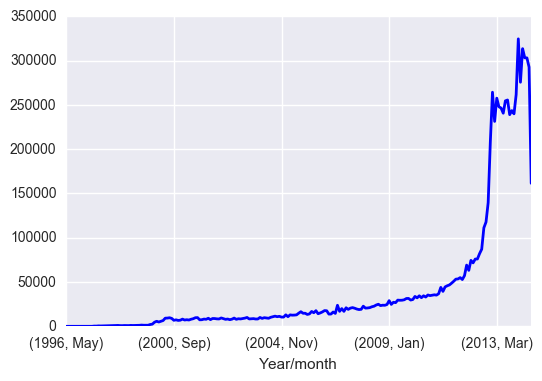

In [117]:
g = df.groupby([df.unixReviewTime.dt.year, df.unixReviewTime.dt.month]).size()
g.index.set_levels([[1996,1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
                    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']],inplace=True)
g.plot(kind = 'line', alpha = 1, linewidth = 2.0, color = 'b') 
plt.xlabel('Year/month')

#### Overall rating over the years

In [111]:
year = df.groupby([df.unixReviewTime.dt.year, df.overall]).size()
year = year.unstack().fillna(0)
year

overall,1,2,3,4,5
unixReviewTime,,,,,
1996,1,2,1,6,15
1997,80,132,174,466,1189
1998,509,554,858,2171,5639
1999,1185,1256,2010,3962,11161
2000,3628,4566,9537,21545,48579
2001,3879,5027,10999,24994,52169
2002,4196,5451,11468,26315,53598
2003,4998,6015,12046,26187,55083
2004,6930,7423,14025,30916,63540


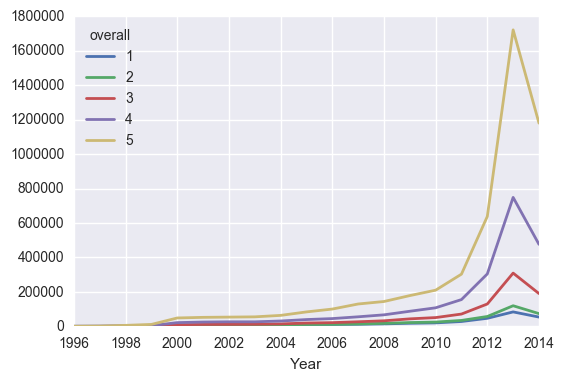

In [119]:
year.plot(linewidth = 2)
plt.xlabel('Year')

### Summary

1. Overall ratings are mostly 4 & 5 stars.
2. A sharp increase is observed in 2013.
3. 25 most popular books (in terms of number of reviews) are listed.
4. 25 reviewers with most numbers of reviews are identified; someone has written 23000 reviews!! We will see their helpfulness ratings in the next notebook(s).
5. While 1996 had only 25 book reviews, a 3 million reviews were written in 2013, which is also ~2 million more than the previous year. What happened in 2013?
6. Overall rating follows 5>4>3>2>1 trend over the years, 5 being the most given rating.